### DATA ANALYSIS AND PREDICTING CUSTOMER CHURN FOR ABC BANK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


### LOAD AND INSPECT DATA(EXPLORATORY DATA ANALYSIS)

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
cat_cols = ['country', 'gender', 'credit_card', 'active_member']
for col in cat_cols:
    print(data[col].value_counts())
    print("=====")

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64
=====
Male      5457
Female    4543
Name: gender, dtype: int64
=====
1    7055
0    2945
Name: credit_card, dtype: int64
=====
1    5151
0    4849
Name: active_member, dtype: int64
=====


#### Finding Relationships Between Variables and the Target.
- First, Categorical variables and then Quantitative Variables.

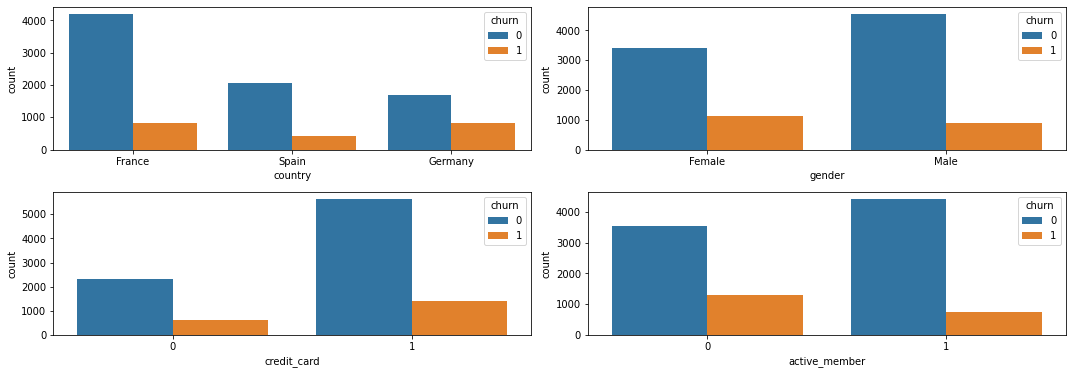

In [6]:
cat_cols = ['country', 'gender', 'credit_card', 'active_member']
plt.figure(figsize=(15,10))
for i, col in enumerate(data[cat_cols]):
    axes=plt.subplot(4,2,i + 1)
    sns.countplot(x=data[col], hue=data['churn'])
plt.tight_layout()
plt.show()

### TAKEAWAY 1
- Insight 1: There are higher churn rates in all three countries but higher in France than the others. It could be because the number of customers in France are more. However Germany and France have the same number of customers that tend to stay in the bank.
- Insight 2: Female customers are more likely to stay than male customers. 
- Insight 3: Customers with credit cards are more likely to stay or leave based on the data but then again it could be because there is a huge difference between the number of customers with credit cards than ones without.
- Insight 4: Active members are more likely to leave than unactive members and vice versa.

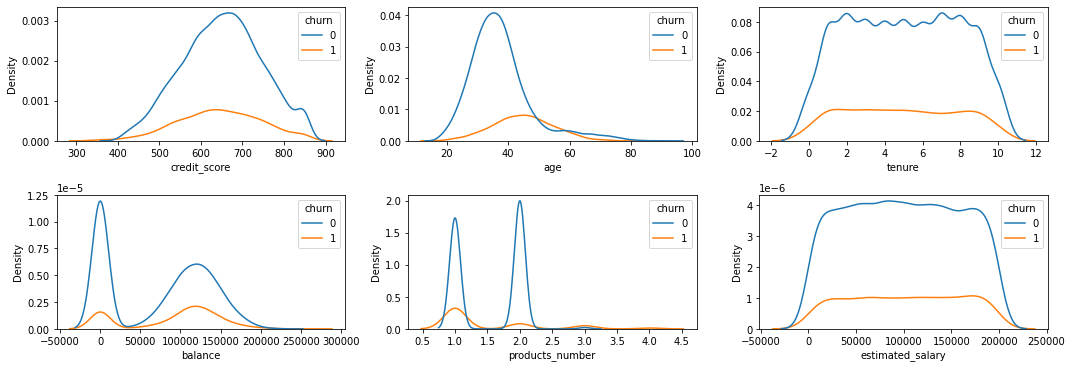

In [7]:
num_col = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
plt.figure(figsize=(15,10))
for i, col in enumerate(data[num_col]):
    axes=plt.subplot(4,3,i + 1)
    sns.kdeplot(x=data[col], hue=data['churn'])
plt.tight_layout()
plt.show()

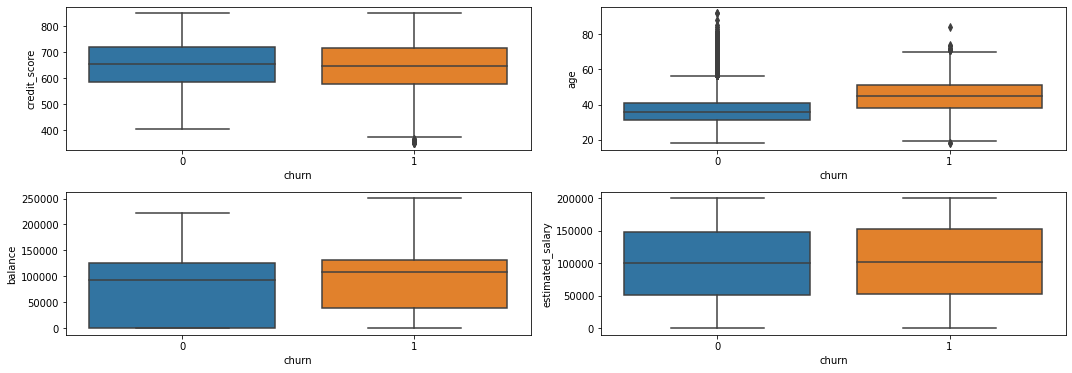

In [8]:
oth_col = ['credit_score', 'age', 'balance', 'estimated_salary']
plt.figure(figsize=(15,10))
for i, col in enumerate(data[oth_col]):
    axes=plt.subplot(4,2,i + 1)
    sns.boxplot(x=data['churn'], y=data[col])
plt.tight_layout()
plt.show()

#### TAKEAWAY 2
- With credit score, the higher the credit score the higher the churn rate even though there is not a huge variation between those that stay and the customers that leave.
- Churn rates are higher for younger customers with age range(20-40). Older customers with age range(40+) tend to stay with the bank.
- Balance: Customers having an account balance less than zero are more likely to leave the bank but with account balance increasing, there is a greater tendency for them to stay with the bank even though there is a tie at the point of increase.
- Estimated Salary: Estimated salary doesnt really have a strong relationship with churn rates as the tendency for a customer to stay or leave both increase with increase in salary.

## Encode Categorical variables and Balance the data

In [9]:
encoder = LabelEncoder()
enc_col = ['country', 'gender']
for col in enc_col:
    data[col] = encoder.fit_transform(data[col])

#data['country'].unique()

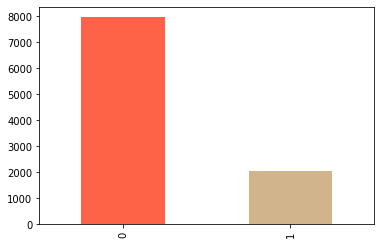

In [10]:
data['churn'].value_counts().plot.bar(color=['tomato', 'tan'])
plt.show()

In [11]:
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']

smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(X, y)

<AxesSubplot:ylabel='churn'>

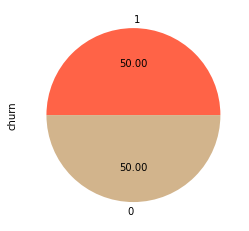

In [13]:
y_balanced.value_counts().plot.pie(autopct='%.2f', colors=['tomato', 'tan'])

## Split Data, Scale and Train data using Various Classifiers and picking one with the highest Accuracy Score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.3, random_state=5)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
classifiers = [GradientBoostingClassifier(), 
               RandomForestClassifier(),
               LogisticRegression(),
               DecisionTreeClassifier(),
               KNeighborsClassifier()]

In [ ]:
for model in classifiers:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    print('\tClassification_report:') 
    print(classification_report(y_test, y_pred))
    print('=======')


GradientBoostingClassifier()
	Classification_report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2397
           1       0.84      0.83      0.84      2381

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778

RandomForestClassifier()
	Classification_report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2397
           1       0.86      0.85      0.85      2381

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778

LogisticRegression()
	Classification_report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2397
           1       0.77      0.78      0.77      2381

    accuracy                       

## GridSeachCv Using Having for Hyperparameter Tuning

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

rd = RandomForestClassifier()
param_grids = {'n_estimators': [100, 300, 500],
                'max_features' : ['sqrt', 'log2'],
                'max_depth' : [3, None],
                'min_samples_leaf': [2, 4, 6, 8],
                'min_samples_split': [2, 5, 10],
                'criterion': ['gini', 'entropy']}

having_clf = HalvingGridSearchCV(estimator=rd, param_grid=param_grids, scoring='accuracy', n_jobs=-1, min_resources='exhaust')   
having_clf.fit(x_train, y_train)       


having_clf.best_score_


0.8513689601408305

In [ ]:
having_clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}